In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [7]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    strike_rate: float
    balls_per_boundary: float
    boundary_percent: float
    summary: str

In [23]:
def calculate_strike_rate(state: BatsmanState):

    runs = state['runs']
    balls = state['balls']
    strike_rate = (runs / balls) * 100 

    return {'strike_rate': strike_rate}

def calculate_balls_per_boundary(state: BatsmanState):

    balls = state['balls']
    fours = state['fours']
    sixes = state['sixes']

    balls_per_boundary = balls / (fours + sixes)

    return {'balls_per_boundary': balls_per_boundary}

def calculate_boundary_percent(state: BatsmanState):

    runs = state['runs']
    fours = state['fours']
    sixes = state['sixes']

    boundary_percent = (((fours * 4) + (sixes * 6)) / runs) * 100

    return {'boundary_percent': boundary_percent}

def generate_summary(state: BatsmanState):

    summary = f"""
    Strike Rate: {state['strike_rate']} \n
    Balls Per Boundary: {state['balls_per_boundary']} \n
    Boundary Percent: {state['boundary_percent']}
    """

    return {'summary': summary}

In [24]:
graph = StateGraph(BatsmanState)

# Nodes
graph.add_node('calculate_strike_rate', calculate_strike_rate)
graph.add_node('calculate_balls_per_boundary', calculate_balls_per_boundary)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('generate_summary', generate_summary)

# Edges

graph.add_edge(START, 'calculate_strike_rate')
graph.add_edge(START, 'calculate_balls_per_boundary')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_strike_rate', 'generate_summary')
graph.add_edge('calculate_balls_per_boundary', 'generate_summary')
graph.add_edge('calculate_boundary_percent', 'generate_summary')

graph.add_edge('generate_summary', END)

# Compile

workflow = graph.compile()

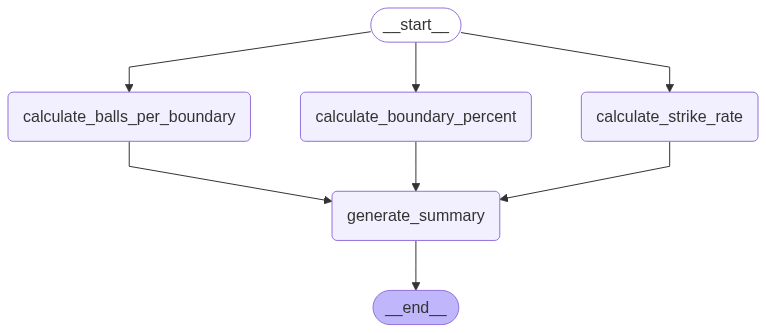

In [25]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [26]:
from pprint import pprint

initial_state = {
    'runs': 100,
    'balls': 40,
    'fours': 10,
    'sixes': 4
}

final_state = workflow.invoke(initial_state)
pprint(final_state)

{'balls': 40,
 'balls_per_boundary': 2.857142857142857,
 'boundary_percent': 64.0,
 'fours': 10,
 'runs': 100,
 'sixes': 4,
 'strike_rate': 250.0,
 'summary': '\n'
            '    Strike Rate: 250.0 \n'
            '\n'
            '    Balls Per Boundary: 2.857142857142857 \n'
            '\n'
            '    Boundary Percent: 64.0\n'
            '    '}
